In [89]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
#import matplotlib.pyplot as plt

import numpy as np
import random

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [90]:
# Experiments:
#    1. Framerate
#    2. Filters
#    3. LTIs characterization
#    4. Fades
    

In [91]:
#1 - Framerate

#Low framerate
oh = thinkdsp.read_wave('audios/oh normal.wav')
display(oh.make_audio()) #Original
ohLow = thinkdsp.Wave(oh.ys[0:len(oh.ys)], oh.ts, oh.framerate / 2)
display(ohLow.make_audio()) # Lower framerate

#High framerate
yeah = thinkdsp.read_wave('audios/yeah normal.wav')
display(yeah.make_audio()) #Original
yeahHigh = thinkdsp.Wave(yeah.ys, yeah.ts, yeah.framerate * 2)
display(yeahHigh.make_audio()) # Higher framerate

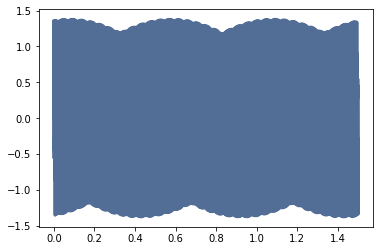

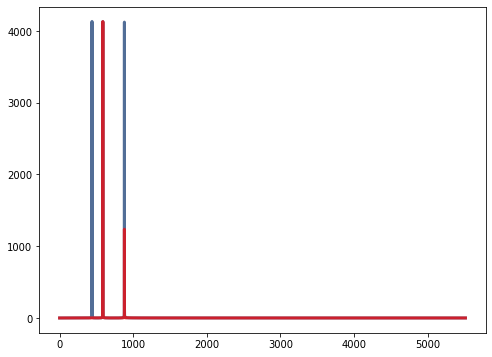

In [118]:
# 2 - Filters

# Create notes
A4_sig = thinkdsp.SinSignal(freq = 440, amp = 0.5, offset = 0)
A4 = A4_sig.make_wave(duration = 1.5, start = 0, framerate = 11025)

D5_sig = thinkdsp.SinSignal(freq = 587.33, amp = 0.5, offset = 0)
D5 = D5_sig.make_wave(duration = 1.5, start = 0, framerate = 11025)

A5_sig = thinkdsp.SinSignal(freq = 880, amp = 0.5, offset = 0)
A5 = A5_sig.make_wave(duration = 1.5, start = 0, framerate = 11025)

# Mix notes
mix_sig = A4_sig + D5_sig + A5_sig
mix = mix_sig.make_wave(duration = 1.5, start = 0, framerate = 11025)

# Display audios
A4.make_audio()
D5.make_audio()
A5.make_audio()
mix.make_audio()

mix.plot()
thinkplot.show()

mix_spec = mix.make_spectrum() # Compute spectrum using FFT

mix_spec.plot() # Plot original mix

mix_spec.high_pass(500) # Remove frequencies below 500Hz
mix_spec.band_stop(700, 900, 0.3) # Attenuate frequencies between 700 and 900Hz, multiplying by a factor of 0.3

mix_spec.plot(color = 'red') # Plot the altered mix

altered_mix = mix_spec.make_wave() # Go back to time domain using RFFT
altered_mix.apodize() # Apodize mix to improve beginning and ending of sample
altered_mix.make_audio() # Display altered mix audio


In [93]:
# 3 - LTI 

miedo = thinkdsp.read_wave('audios/miedo normal.wav')
clap = thinkdsp.read_wave('audios/clap_reverb.wav')

clap.truncate(len(miedo))
display(miedo.make_audio())
display(clap.make_audio())

mix = (clap.make_spectrum() * miedo.make_spectrum()).make_wave()
mix.apodize()
mix.make_audio()

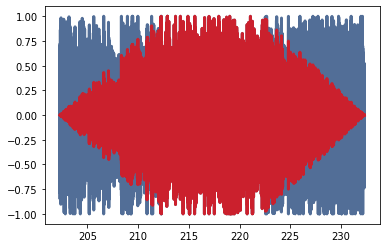

In [119]:
# 4 - Fades

solo = thinkdsp.read_wave('audios/spirit_solo.wav') # Load audio file
solo = solo.segment(202.31, 30) # Select audio segment

solo.plot() # Display original waveform

framerate = solo.framerate

fade_length = 10 # In seconds

# Fade in

fade_in = np.linspace(0, 1, fade_length * framerate) # Scale array

fade_in = np.pad(fade_in, (0, len(solo.ys) - len(fade_in)), 'constant', constant_values=(0, 1)) # Pad with 1s to multiply ys

solo.ys = np.multiply(solo.ys, fade_in) # Apply fade in


# Fade out

fade_out = np.flip(fade_in) # Compute fade out, which is the reverse of the fade in

solo.ys = np.multiply(solo.ys, fade_out) # Apply fade out

# Dispĺay results

solo.plot(color = 'red') # Plot waveform after applying fades

solo.make_audio() # Show audio widget